In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("sim_data_raw_with_cost_ranges.csv")
df

C:\Users\joshsu\AppData\Local\Temp\ipykernel_1924\2260152570.py:1: DtypeWarning: Columns (49) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("sim_data_raw_with_cost_ranges.csv")


,iptsc_rdts_used,iptsc_drugs_used_school,cases_treated,severe_cases_treated,received_smc_u5,received_smc_5-10,received_smc_10-15,received_ivermectin,received_primaquine,pfpr0_5,...,cost_SMC_u5_mean,cost_facility_low,cost_facility_high,cost_severe,cost_ITNs,cost_ivermectin,cost_primaquine,cost_low,cost_high,cost_mean
0,0,0,2861,0,0,0,0,0,0,0.087048,...,0.0000,12931.72,34103.12,0.0,8680.0,0.0,0.0,21611.72,42783.120,32197.4200
1,0,0,2813,0,0,0,0,0,0,0.090804,...,0.0000,12714.76,33530.96,0.0,8680.0,0.0,0.0,21394.76,42210.960,31802.8600
2,0,0,2686,0,0,0,0,0,0,0.092848,...,0.0000,12140.72,32017.12,0.0,8680.0,0.0,0.0,20820.72,40697.120,30758.9200
3,0,0,2962,0,0,0,0,0,0,0.094327,...,0.0000,13388.24,35307.04,0.0,8680.0,0.0,0.0,22068.24,43987.040,33027.6400
4,0,0,2801,0,0,0,0,0,0,0.092801,...,0.0000,12660.52,33387.92,0.0,8680.0,0.0,0.0,21340.52,42067.920,31704.2200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11495,0,0,4391,0,3734,3405,0,0,0,0.300372,...,6245.1150,19847.32,52340.72,0.0,8680.0,0.0,0.0,38913.24,85070.255,61991.7475
11496,0,0,4476,0,3838,3413,0,0,0,0.308730,...,6419.0550,20231.52,53353.92,0.0,8680.0,0.0,0.0,39400.88,86379.455,62890.1675
11497,0,0,4426,0,3698,3363,0,0,0,0.298432,...,6184.9050,20005.52,52757.92,0.0,8680.0,0.0,0.0,38951.68,85216.105,62083.8925
11498,0,0,4519,0,3703,3384,0,0,0,0.297721,...,6193.2675,20425.88,53866.48,0.0,8680.0,0.0,0.0,39421.13,86427.645,62924.3875


In [3]:
# Select southern archetype and transmission level 0.02
foo = df[(df["archetype"] == "Southern") & (df["transmission_level"] == 0.2) & (df["scenario_number"]==6)]

In [4]:
foo.columns

Index(['iptsc_rdts_used', 'iptsc_drugs_used_school', 'cases_treated',
       'severe_cases_treated', 'received_smc_u5', 'received_smc_5-10',
       'received_smc_10-15', 'received_ivermectin', 'received_primaquine',
       'pfpr0_5', 'pfpr2_10', 'pfpr6_15', 'pfpr16_500', 'pfpr_all',
       'clinical_incidence0_5', 'clinical_incidence2_10',
       'clinical_incidence6_15', 'clinical_incidence16_500',
       'clinical_incidence_all', 'severe_incidence0_5', 'severe_incidence2_10',
       'severe_incidence6_15', 'severe_incidence16_500',
       'severe_incidence_all', 'pop0_5', 'pop2_10', 'pop6_15', 'pop16_500',
       'pop_all', 'avg_age', 'avg_age_clinical_cases', 'avg_age_severe_cases',
       'sim_id', 'archetype', 'baseline_transmission_metric', 'Run_Number',
       'scenario_number', 'transmission_level', 'iptsc_on', 'delivery_mode',
       'campaign_timing', 'screen_type', 'drug_type', 'out_of_school_rate',
       'ivermectin', 'primaquine', 'itn_coverage', 'hs_rate', 'smc_on',
    

In [5]:
def sample_as_normal(min_val, max_val, n_samples):
    # Sample from normal distribution where 99% of probability distribution is within min and max
    mean = (min_val + max_val) / 2
    sigma = 0.194*(max_val - min_val)
    return np.random.normal(mean, sigma, n_samples)

In [6]:
# Sample 1k costs from these ranges
# Iterate over rows
costs_all = []
for index, row in foo.iterrows():
    cost_IPTsc = sample_as_normal(row["cost_IPTsc_low"], row["cost_IPTsc_high"], 10000)
    cost_SMC_u5 = sample_as_normal(row["cost_SMC_u5_low"], row["cost_SMC_u5_high"], 10000)
    cost_facility = sample_as_normal(row["cost_facility_low"], row["cost_facility_high"], 10000)
    
    cost = cost_IPTsc + cost_facility + row["cost_severe"] + row["cost_ITNs"] + cost_SMC_u5 + row["cost_ivermectin"] + row["cost_primaquine"]
    
    costs_all.extend(cost)
    # print(row["cost_mean"])

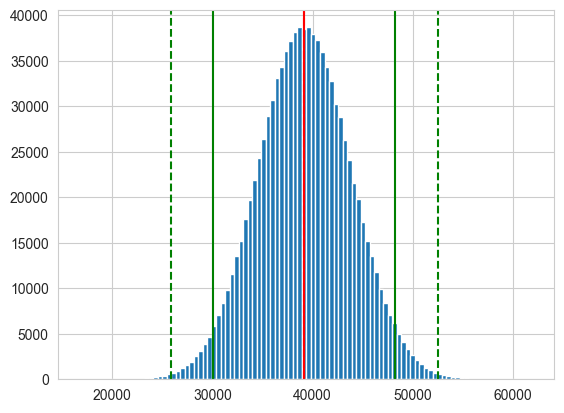

In [7]:
plt.hist(costs_all, bins=100)

plt.axvline(np.mean(costs_all), color="red")
ci = 1.96*np.std(costs_all)
plt.axvline(np.mean(costs_all) - ci, color="green")
plt.axvline(np.mean(costs_all) + ci, color="green")

plt.axvline(np.mean(foo["cost_mean"]), color="red", linestyle='dashed')
plt.axvline(np.mean(foo["cost_low"]), color="green", linestyle='dashed')
plt.axvline(np.mean(foo["cost_high"]), color="green", linestyle='dashed')

In [8]:
def sample_costs(df_scenario, N_per_replicate=10000):
    costs_all = []
    costs_iptsc_all = []
    costs_smc_all = []
    costs_facility_all = []
    
    for index, row in df_scenario.iterrows():
        cost_IPTsc = sample_as_normal(row["cost_IPTsc_low"], row["cost_IPTsc_high"], N_per_replicate)
        cost_SMC_u5 = sample_as_normal(row["cost_SMC_u5_low"], row["cost_SMC_u5_high"], N_per_replicate)
        cost_facility = sample_as_normal(row["cost_facility_low"], row["cost_facility_high"], N_per_replicate)
        
        cost = cost_IPTsc + cost_facility + row["cost_severe"] + row["cost_ITNs"] + cost_SMC_u5 + row["cost_ivermectin"] + row["cost_primaquine"]
        
        costs_all.extend(cost)
        costs_iptsc_all.extend(cost_IPTsc)
        costs_smc_all.extend(cost_SMC_u5)
        costs_facility_all.extend(cost_facility)
        
    return np.mean(costs_all), np.std(costs_all), np.mean(costs_iptsc_all), np.std(costs_iptsc_all), np.mean(costs_smc_all), np.std(costs_smc_all), np.mean(costs_facility_all), np.std(costs_facility_all)

def sample_costs_pandas(group):
    m, s, m_iptsc, s_iptsc, m_smc, s_smc, m_facility, s_facility = sample_costs(group)
    return pd.Series([m, s, m_iptsc, s_iptsc, m_smc, s_smc, m_facility, s_facility], index=['mean', 'std', 'mean_iptsc', 'std_iptsc', 'mean_smc', 'std_smc', 'mean_facility', 'std_facility'])

In [9]:
sample_costs_pandas(foo)

mean             39196.072677
std               4629.671396
mean_iptsc        4480.878862
std_iptsc          622.054779
mean_smc             0.000000
std_smc              0.000000
mean_facility    26035.193815
std_facility      4588.664016
dtype: float64

In [10]:
# create a new dataframe with archetype, transmission level, scenario number, and the mean and std of the costs
result = df.groupby(['archetype', 'transmission_level', 'scenario_number']).apply(sample_costs_pandas).reset_index()


In [11]:
result

,archetype,transmission_level,scenario_number,mean,std,mean_iptsc,std_iptsc,mean_smc,std_smc,mean_facility,std_facility
0,Central,0.05,0,32215.306857,4224.310028,0.000000,0.000000,0.0,0.0,23535.306857,4224.310028
1,Central,0.05,5,29519.615922,3445.853141,0.000000,0.000000,0.0,0.0,18359.615922,3445.853141
2,Central,0.05,6,33941.440212,3835.956753,4686.484289,650.085757,0.0,0.0,20574.955923,3781.073543
3,Central,0.05,7,36388.529050,3583.980005,16475.956290,2607.245065,0.0,0.0,11232.572760,2488.414780
4,Central,0.05,8,36705.389707,2907.492520,13052.981411,688.759858,0.0,0.0,14972.408296,2821.721909
...,...,...,...,...,...,...,...,...,...,...,...
110,Southern,0.40,5,52261.864883,7223.907978,0.000000,0.000000,0.0,0.0,41101.864883,7223.907978
111,Southern,0.40,6,53261.805029,7064.969238,4487.324097,622.049009,0.0,0.0,40094.480933,7037.414373
112,Southern,0.40,7,58083.409010,6284.968181,17161.376280,2722.306023,0.0,0.0,32242.032730,5668.024429
113,Southern,0.40,8,55159.279942,6004.251777,12537.974772,647.172398,0.0,0.0,33941.305169,5971.333246


In [12]:
df_compare = pd.read_csv("sim_data_full_with_costs.csv")
print(df_compare.columns)
df_compare = df_compare[['archetype', 'transmission_level', 'scenario_number', 'cost_mean', 'cost_low', 'cost_high', 'cost_IPTsc_overhead_low', 'cost_IPTsc_overhead_high', 'cost_IPTsc_drugs', 'cost_IPTsc_low', 'cost_IPTsc_high', 'cost_SMC_u5_low', 'cost_SMC_u5_high', 'cost_facility_low', 'cost_facility_high']]

Index(['archetype', 'baseline_transmission_metric', 'transmission_level',
       'scenario_number', 'iptsc_rdts_used', 'iptsc_drugs_used_school',
       'cases_treated', 'severe_cases_treated', 'received_smc_u5',
       'received_smc_5-10',
       ...
       'cost_severe', 'cost_ITNs', 'cost_ivermectin', 'cost_primaquine',
       'cost_low', 'cost_high', 'cost_mean', 'cost_low_IPTsc_only',
       'cost_high_IPTsc_only', 'cost_mean_IPTsc_only'],
      dtype='object', length=147)


In [13]:
foo = pd.merge(result, df_compare, how='inner', on=['archetype', 'transmission_level', 'scenario_number'])
foo["err_old"] = foo["cost_high"] - foo["cost_low"]

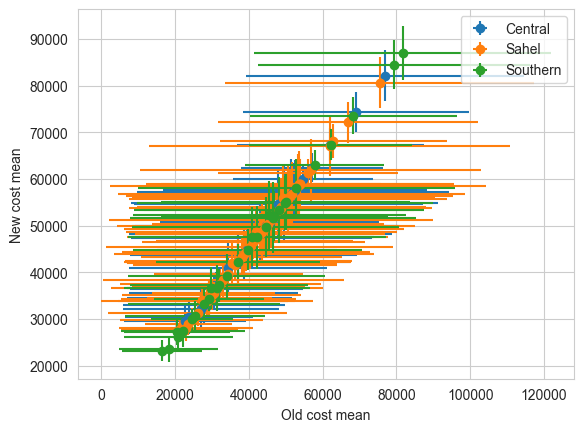

In [14]:
# plt.errorbar(foo["cost_mean"], foo["mean"], xerr=foo["err_old"], yerr=foo["std"], fmt='o')
for a, sdf in foo.groupby("archetype"):
    plt.errorbar(sdf["cost_mean"], sdf["mean"], xerr=sdf["err_old"], yerr=sdf["std"], fmt='o', label=a)
plt.xlabel("Old cost mean")
plt.ylabel("New cost mean")
plt.legend()

In [15]:
result

,archetype,transmission_level,scenario_number,mean,std,mean_iptsc,std_iptsc,mean_smc,std_smc,mean_facility,std_facility
0,Central,0.05,0,32215.306857,4224.310028,0.000000,0.000000,0.0,0.0,23535.306857,4224.310028
1,Central,0.05,5,29519.615922,3445.853141,0.000000,0.000000,0.0,0.0,18359.615922,3445.853141
2,Central,0.05,6,33941.440212,3835.956753,4686.484289,650.085757,0.0,0.0,20574.955923,3781.073543
3,Central,0.05,7,36388.529050,3583.980005,16475.956290,2607.245065,0.0,0.0,11232.572760,2488.414780
4,Central,0.05,8,36705.389707,2907.492520,13052.981411,688.759858,0.0,0.0,14972.408296,2821.721909
...,...,...,...,...,...,...,...,...,...,...,...
110,Southern,0.40,5,52261.864883,7223.907978,0.000000,0.000000,0.0,0.0,41101.864883,7223.907978
111,Southern,0.40,6,53261.805029,7064.969238,4487.324097,622.049009,0.0,0.0,40094.480933,7037.414373
112,Southern,0.40,7,58083.409010,6284.968181,17161.376280,2722.306023,0.0,0.0,32242.032730,5668.024429
113,Southern,0.40,8,55159.279942,6004.251777,12537.974772,647.172398,0.0,0.0,33941.305169,5971.333246


In [16]:

# Costs as they are now are over 2 years, so we need to divide by 2 before saving
result["mean"] = result["mean"] / 2
result["std"] = result["std"] / 2
result["mean_iptsc"] = result["mean_iptsc"] / 2
result["std_iptsc"] = result["std_iptsc"] / 2
result["mean_smc"] = result["mean_smc"] / 2
result["std_smc"] = result["std_smc"] / 2
result["mean_facility"] = result["mean_facility"] / 2
result["std_facility"] = result["std_facility"] / 2


In [17]:
result.to_csv("sim_data_full_with_costs_corrected.csv", index=False)